<a href="https://colab.research.google.com/github/perezrmaria/intonation_analysis/blob/main/looking_for_short_long_border_clusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering for trimming
Looking for some indices to see where to call short and long notes

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pretty_midi

import tslearn
from tslearn.clustering import TimeSeriesKMeans
from tslearn.clustering import KShape
from tqdm import tqdm

from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/Shareddrives/Master Thesis')
import midi_functions
import peak_functions
import freqvibrato_functions
import dict_functions
import cluster_functions

from 0 to 240ms (41.37 samples)

In [ ]:
file_path = '/content/drive/Shareddrives/Master Thesis/iter1_midi/wohlfahrt_first_30_no_accidentals'

all_info_method, all_time_method, len_every_mid = midi_functions.create_dic_all_method_original(file_path, low_duration=0, high_duration=0.24)
X = midi_functions.formatting_all_info(all_info_method, max_num_samples=42, min_num_samples=0)

  0%|          | 0/8 [00:00<?, ?it/s]

Wohlfahrt-Op45-26-ZYZ


Wohlfahrt-Op45-26-TimRohwer


Wohlfahrt-Op45-26-BernardChevalier


Wohlfahrt-Op45-26-MichaelPijoan


Wohlfahrt-Op45-26-JPRafferty


Wohlfahrt-Op45-26-BrianClement


Wohlfahrt-Op45-26-BochanKang


 25%|██▌       | 2/8 [00:02<00:06,  1.15s/it]

Wohlfahrt-Op45-10-ZYZ
Wohlfahrt-Op45-10-BrianClement
Wohlfahrt-Op45-10-JPRafferty


 38%|███▊      | 3/8 [00:02<00:04,  1.22it/s]

Wohlfahrt-Op45-10-TimRohwer


Wohlfahrt-Op45-11-BochanKang


Wohlfahrt-Op45-11-ZYZ


Wohlfahrt-Op45-11-MichaelPijoan


Wohlfahrt-Op45-11-TimRohwer
Wohlfahrt-Op45-11-JPRafferty


Wohlfahrt-Op45-11-BernardChevalier


 50%|█████     | 4/8 [00:04<00:04,  1.04s/it]

Wohlfahrt-Op45-05-BrianClement


Wohlfahrt-Op45-05-BochanKang
Wohlfahrt-Op45-05-MichaelPijoan


Wohlfahrt-Op45-05-ZYZ


 62%|██████▎   | 5/8 [00:00<00:00,  6.16it/s]

Wohlfahrt-Op45-05-TimRohwer
Wohlfahrt-Op45-05-BernardChevalier
Wohlfahrt-Op45-05-JPRafferty


 62%|██████▎   | 5/8 [00:05<00:03,  1.13s/it]

Wohlfahrt-Op45-03-BernardChevalier


Wohlfahrt-Op45-03-MichaelPijoan


Wohlfahrt-Op45-03-BochanKang


Wohlfahrt-Op45-03-BrianClement


Wohlfahrt-Op45-03-JPRafferty


Wohlfahrt-Op45-03-ZYZ


 75%|███████▌  | 6/8 [00:07<00:02,  1.30s/it]

Wohlfahrt-Op45-15-BernardChevalier


Wohlfahrt-Op45-15-JPRafferty


Wohlfahrt-Op45-15-BrianClement


Wohlfahrt-Op45-15-TimRohwer


Wohlfahrt-Op45-15-MichaelPijoan


Wohlfahrt-Op45-15-ZYZ


Wohlfahrt-Op45-15-BochanKang


 88%|████████▊ | 7/8 [00:11<00:02,  2.39s/it]

Wohlfahrt-Op45-01-TimRohwer


Wohlfahrt-Op45-01-MichaelPijoan


Wohlfahrt-Op45-01-JPRafferty


Wohlfahrt-Op45-01-ZYZ


Wohlfahrt-Op45-01-BrianClement


Wohlfahrt-Op45-01-BernardChevalier


Wohlfahrt-Op45-01-BochanKang


100%|██████████| 8/8 [00:13<00:00,  1.71s/it]


Shape before formatting (10346, 41)
Shape after formatting (10346, 41, 1)


In [ ]:
df_dict = {}
main_folder = '/content/drive/Shareddrives/Master Thesis/iter1_midi/wohlfahrt_first_30_no_accidentals'
for folder_name in tqdm(os.listdir(main_folder)):
        folder_path = os.path.join(main_folder, folder_name)

        if os.path.isdir(folder_path):  # Check if it's a folder
            files = os.listdir(folder_path)
            for one_file in tqdm(files):
                if one_file == ".DS_Store":
                    continue
                file_path = os.path.join(folder_path, one_file)
                name_part = one_file.split('_')[0]+'-'+one_file.split('_')[1]+'-'+one_file.split('_')[2]
                print(name_part)
                if file_path.endswith('.mid'):
                    midi_data = pretty_midi.PrettyMIDI(file_path)
                    notes_df, longest_notes = look_longest_notes(midi_data)
                    df_dict[name_part] = notes_df

  0%|          | 0/8 [00:00<?, ?it/s]

Wohlfahrt-Op45-26-ZYZ
Wohlfahrt-Op45-26-TimRohwer


Wohlfahrt-Op45-26-BernardChevalier
Wohlfahrt-Op45-26-MichaelPijoan
Wohlfahrt-Op45-26-JPRafferty


 25%|██▌       | 2/8 [00:00<00:02,  2.77it/s]

Wohlfahrt-Op45-26-BrianClement
Wohlfahrt-Op45-26-BochanKang


Wohlfahrt-Op45-10-ZYZ
Wohlfahrt-Op45-10-BrianClement


Wohlfahrt-Op45-10-JPRafferty
Wohlfahrt-Op45-10-TimRohwer


 38%|███▊      | 3/8 [00:00<00:01,  3.24it/s]

Wohlfahrt-Op45-11-BochanKang


Wohlfahrt-Op45-11-ZYZ
Wohlfahrt-Op45-11-MichaelPijoan
Wohlfahrt-Op45-11-TimRohwer


Wohlfahrt-Op45-11-JPRafferty


 50%|█████     | 4/8 [00:01<00:01,  2.54it/s]

Wohlfahrt-Op45-11-BernardChevalier


Wohlfahrt-Op45-05-BrianClement
Wohlfahrt-Op45-05-BochanKang


Wohlfahrt-Op45-05-MichaelPijoan


Wohlfahrt-Op45-05-ZYZ
Wohlfahrt-Op45-05-TimRohwer
Wohlfahrt-Op45-05-BernardChevalier


 62%|██████▎   | 5/8 [00:02<00:01,  2.23it/s]

Wohlfahrt-Op45-05-JPRafferty


Wohlfahrt-Op45-03-BernardChevalier
Wohlfahrt-Op45-03-MichaelPijoan


Wohlfahrt-Op45-03-BochanKang


Wohlfahrt-Op45-03-BrianClement
Wohlfahrt-Op45-03-JPRafferty
Wohlfahrt-Op45-03-ZYZ


 75%|███████▌  | 6/8 [00:02<00:00,  2.21it/s]

Wohlfahrt-Op45-15-BernardChevalier
Wohlfahrt-Op45-15-JPRafferty


Wohlfahrt-Op45-15-BrianClement
Wohlfahrt-Op45-15-TimRohwer
Wohlfahrt-Op45-15-MichaelPijoan


Wohlfahrt-Op45-15-ZYZ
Wohlfahrt-Op45-15-BochanKang


 88%|████████▊ | 7/8 [00:03<00:00,  1.73it/s]

Wohlfahrt-Op45-01-TimRohwer
Wohlfahrt-Op45-01-MichaelPijoan
Wohlfahrt-Op45-01-JPRafferty


Wohlfahrt-Op45-01-ZYZ
Wohlfahrt-Op45-01-BrianClement
Wohlfahrt-Op45-01-BernardChevalier


100%|██████████| 8/8 [00:03<00:00,  2.02it/s]

Wohlfahrt-Op45-01-BochanKang


## 40 clusters notes from 0 to 240ms

Euclidean k-means
318.357 --> 276.137 --> 269.192 --> 265.598 --> 263.285 --> 262.043 --> 261.257 --> 260.645 --> 260.153 --> 259.819 --> 259.411 --> 259.027 --> 258.677 --> 258.407 --> 258.150 --> 257.915 --> 257.709 --> 257.518 --> 257.395 --> 257.309 --> 257.239 --> 257.165 --> 257.096 --> 257.027 --> 256.975 --> 256.939 --> 256.913 --> 256.884 --> 256.859 --> 256.840 --> 256.821 --> 256.792 --> 256.744 --> 256.721 --> 256.705 --> 256.691 --> 256.673 --> 256.642 --> 256.609 --> 256.577 --> 256.549 --> 256.498 --> 256.434 --> 256.383 --> 256.338 --> 256.271 --> 256.109 --> 255.868 --> 255.785 --> 255.703 --> 

Number of clusters:  40
Total number of cases:  10346
Cluster distribution:  [ 47 593 363 157 220 310 544  55 203 446 304 107  94 271 110 496 160 248
 143  41 222 134 479 134 138 158 466 182 325 599 225 522  16 321 316 219
  45  54 475 404]


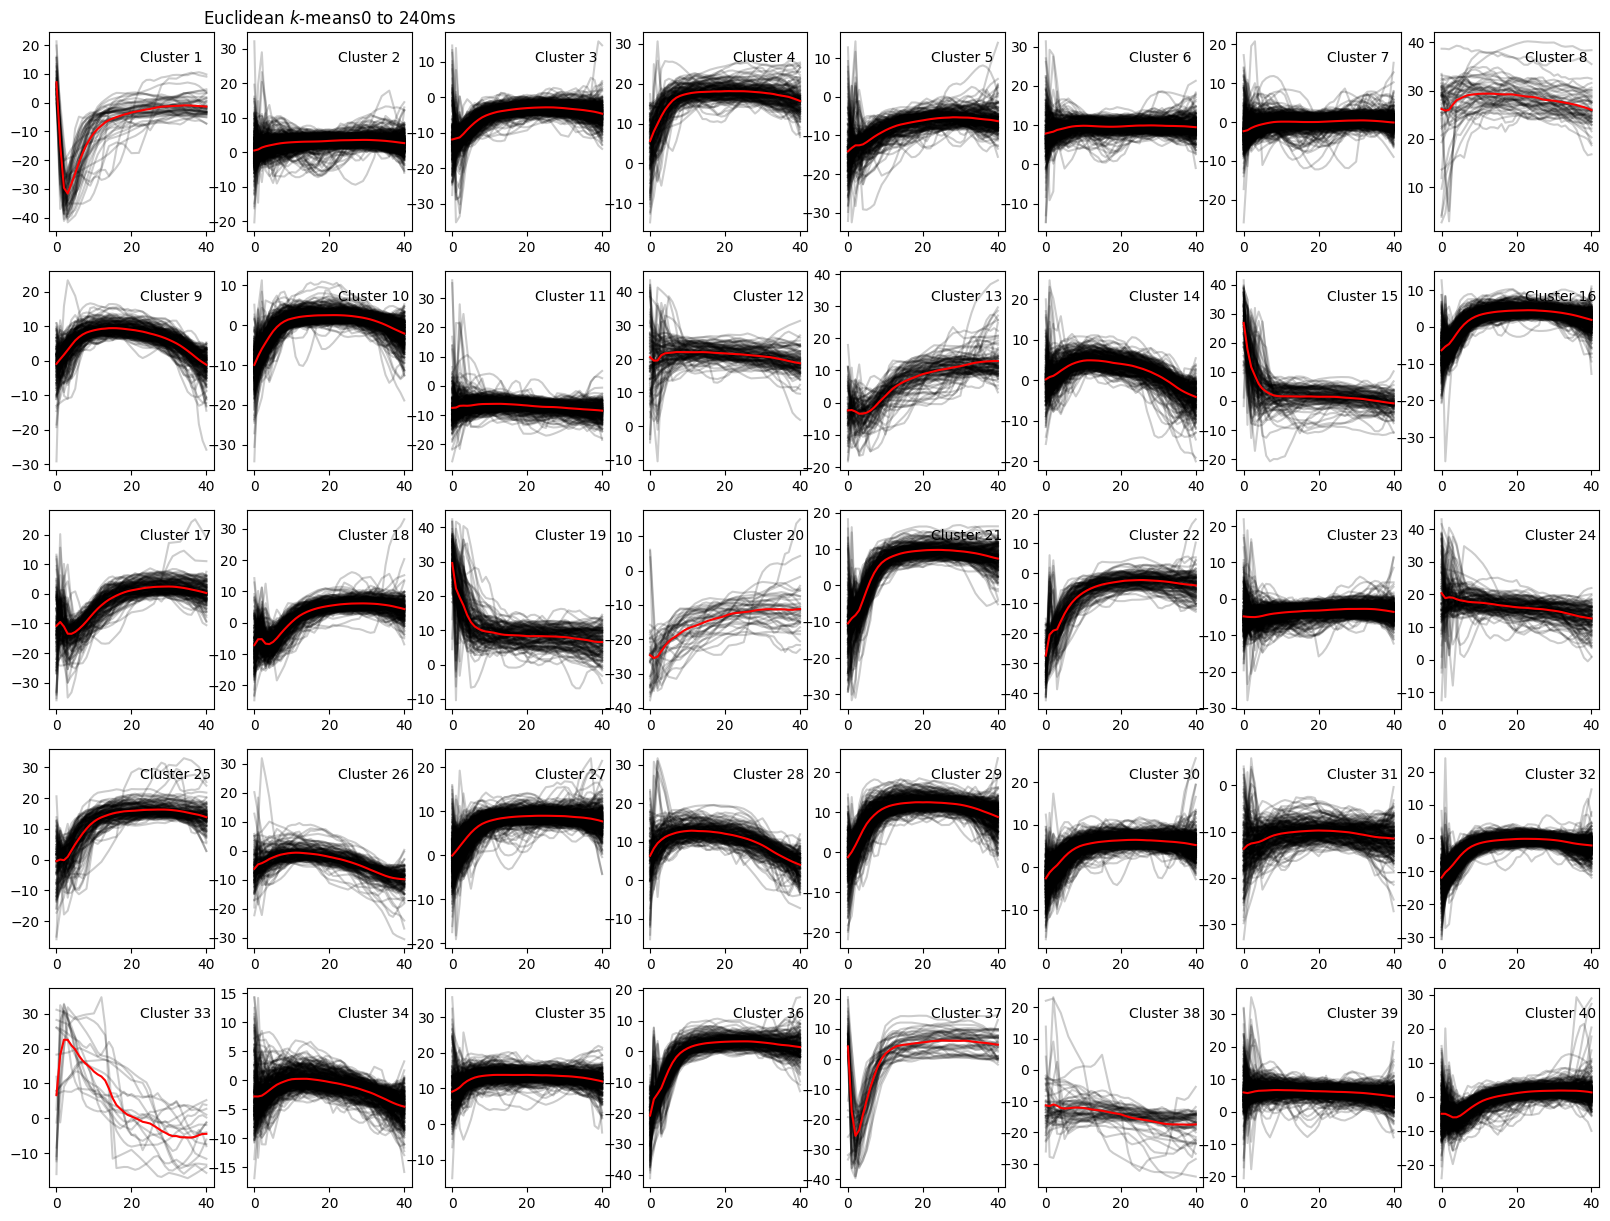

In [ ]:
y_pred, km = cluster_functions.cluster_and_plot(X[0], num_clusters=40, num_samples ='0 to 240ms')
cluster_functions.cluster_distribution(y_pred)

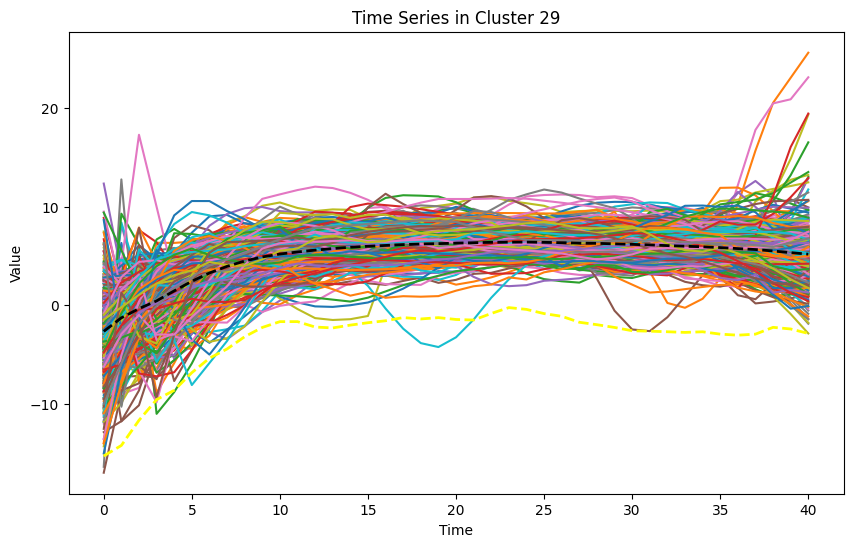

In [ ]:
cluster_to_visualize = 29

cluster_centers = km.cluster_centers_
indices_in_cluster = (y_pred == cluster_to_visualize)
time_series_in_cluster = (X[0])[indices_in_cluster]


plt.figure(figsize=(10, 6))
for i, time_series in enumerate(time_series_in_cluster):
    plt.plot(time_series, label=f"Time Series {i+1}")


cluster_center = cluster_centers[cluster_to_visualize]
plt.plot(cluster_center, label=f"Cluster Center {cluster_to_visualize}", color='black', linewidth=2, linestyle='dashed')

plt.plot(X[0][258], color='yellow', linewidth=2, linestyle='dashed')

plt.title(f"Time Series in Cluster {cluster_to_visualize}")
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()

### Assign each cluster to a note and etude

In [ ]:
cluster_assignments = {}
count = 0
for i, (key, value) in enumerate(all_info_method.items()):
    for note, inner_list in value.items():
        cluster_assignments[(key, note)] = int(y_pred[count])
        count+=1
display(cluster_assignments[:5])

## Trying to cluster the cluster centers to try see some tendencies

(40, 41, 1)
Euclidean k-means
894.319 --> 762.772 --> 762.772 --> 

Number of clusters:  5
Total number of cases:  40
Cluster distribution:  [ 9 16  4  3  8]


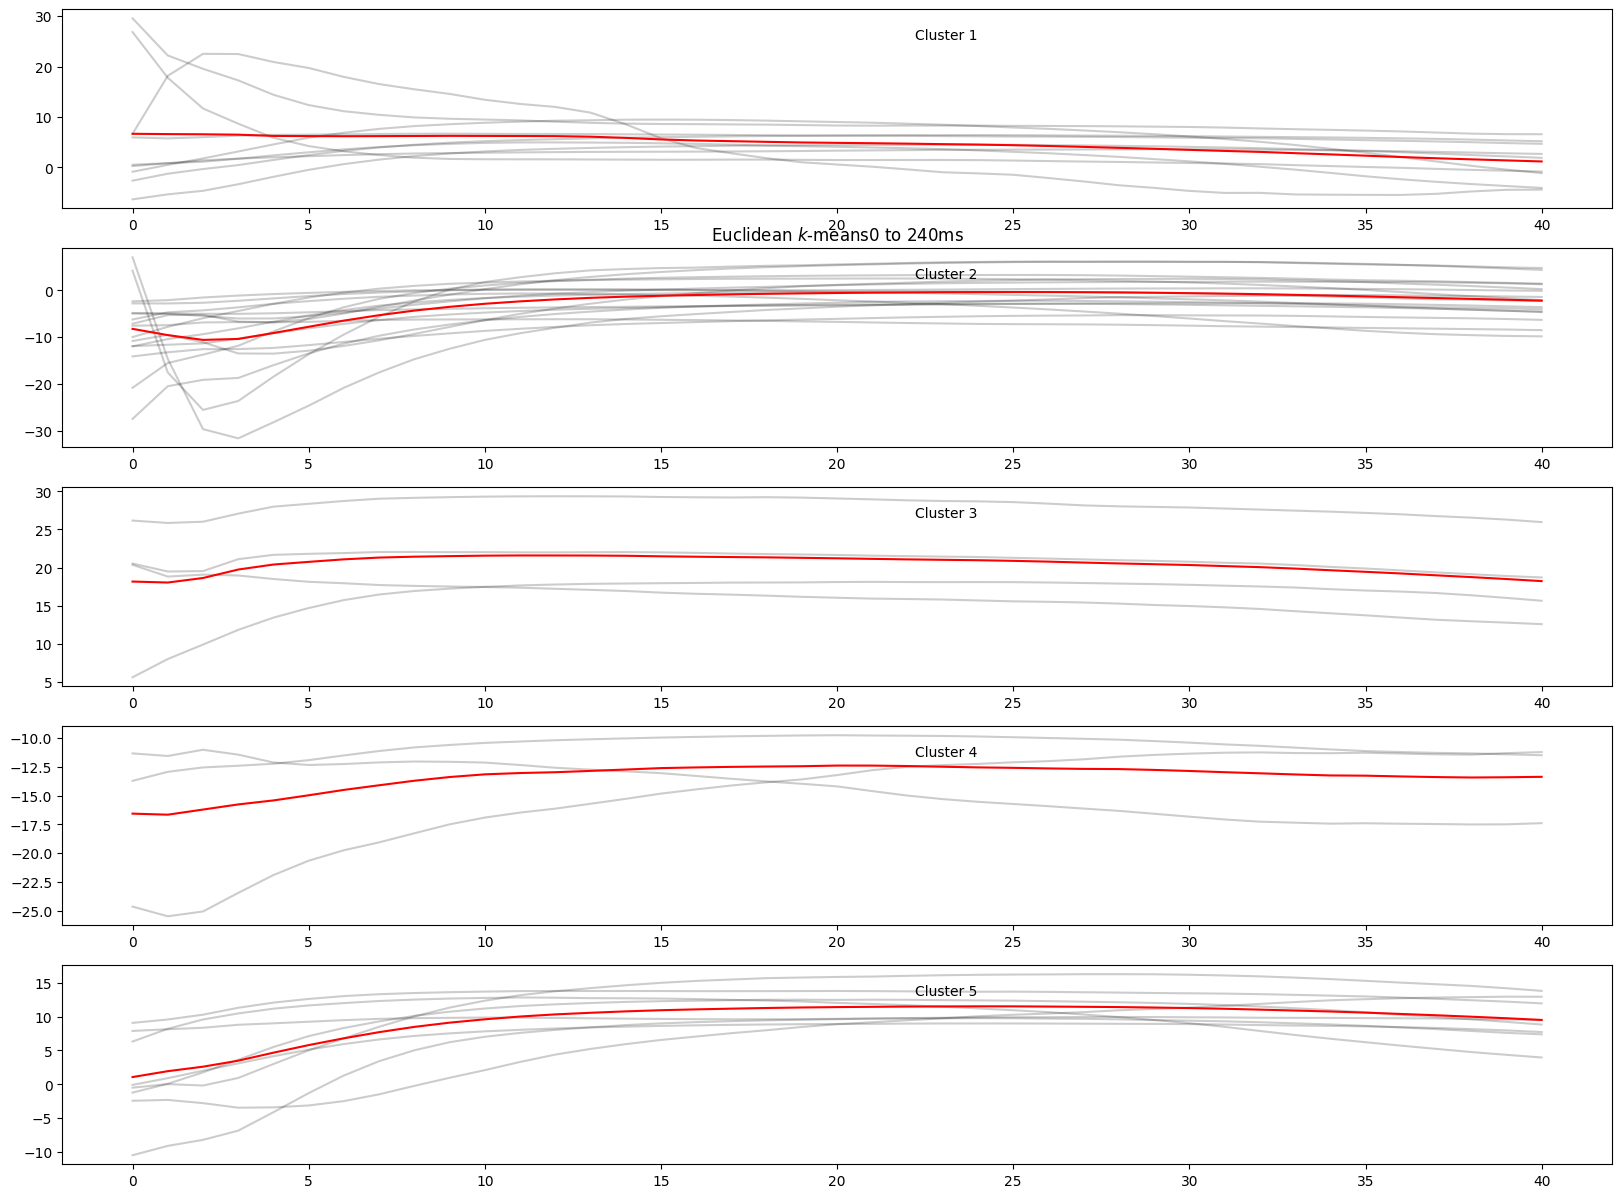

In [ ]:
cluster_centers = km.cluster_centers_
print(cluster_centers.shape)

y_pred1, km1 = cluster_functions.cluster_and_plot(cluster_centers, num_clusters=5, num_samples ='0 to 240ms')
cluster_functions.cluster_distribution(y_pred1)

## 60 clusters notes from 0 to 240ms

Euclidean k-means
266.718 --> 235.578 --> 230.800 --> 227.995 --> 226.104 --> 224.488 --> 223.369 --> 222.558 --> 222.020 --> 221.675 --> 221.351 --> 221.070 --> 220.840 --> 220.699 --> 220.601 --> 220.536 --> 220.446 --> 220.346 --> 220.309 --> 220.283 --> 220.268 --> 220.220 --> 220.130 --> 220.100 --> 220.090 --> 220.076 --> 220.065 --> 220.055 --> 220.047 --> 220.041 --> 220.034 --> 220.020 --> 220.014 --> 219.998 --> 219.973 --> 219.848 --> 219.804 --> 219.763 --> 219.672 --> 219.626 --> 219.601 --> 219.560 --> 219.526 --> 219.498 --> 219.463 --> 219.433 --> 219.403 --> 219.364 --> 219.336 --> 219.298 --> 

Number of clusters:  60
Total number of cases:  10346
Cluster distribution:  [ 28 279 287 209  35 213 101 100 203 486  42 208 203 449 287  31 148 246
 176 114  59  95 240 278 382  70  53 216 435  26 117 106 127 206 136   9
 427 136 107 400 150  32  46 111  11 206  28 215 102 127  86 227  21 107
 100 437 364 327 124  55]


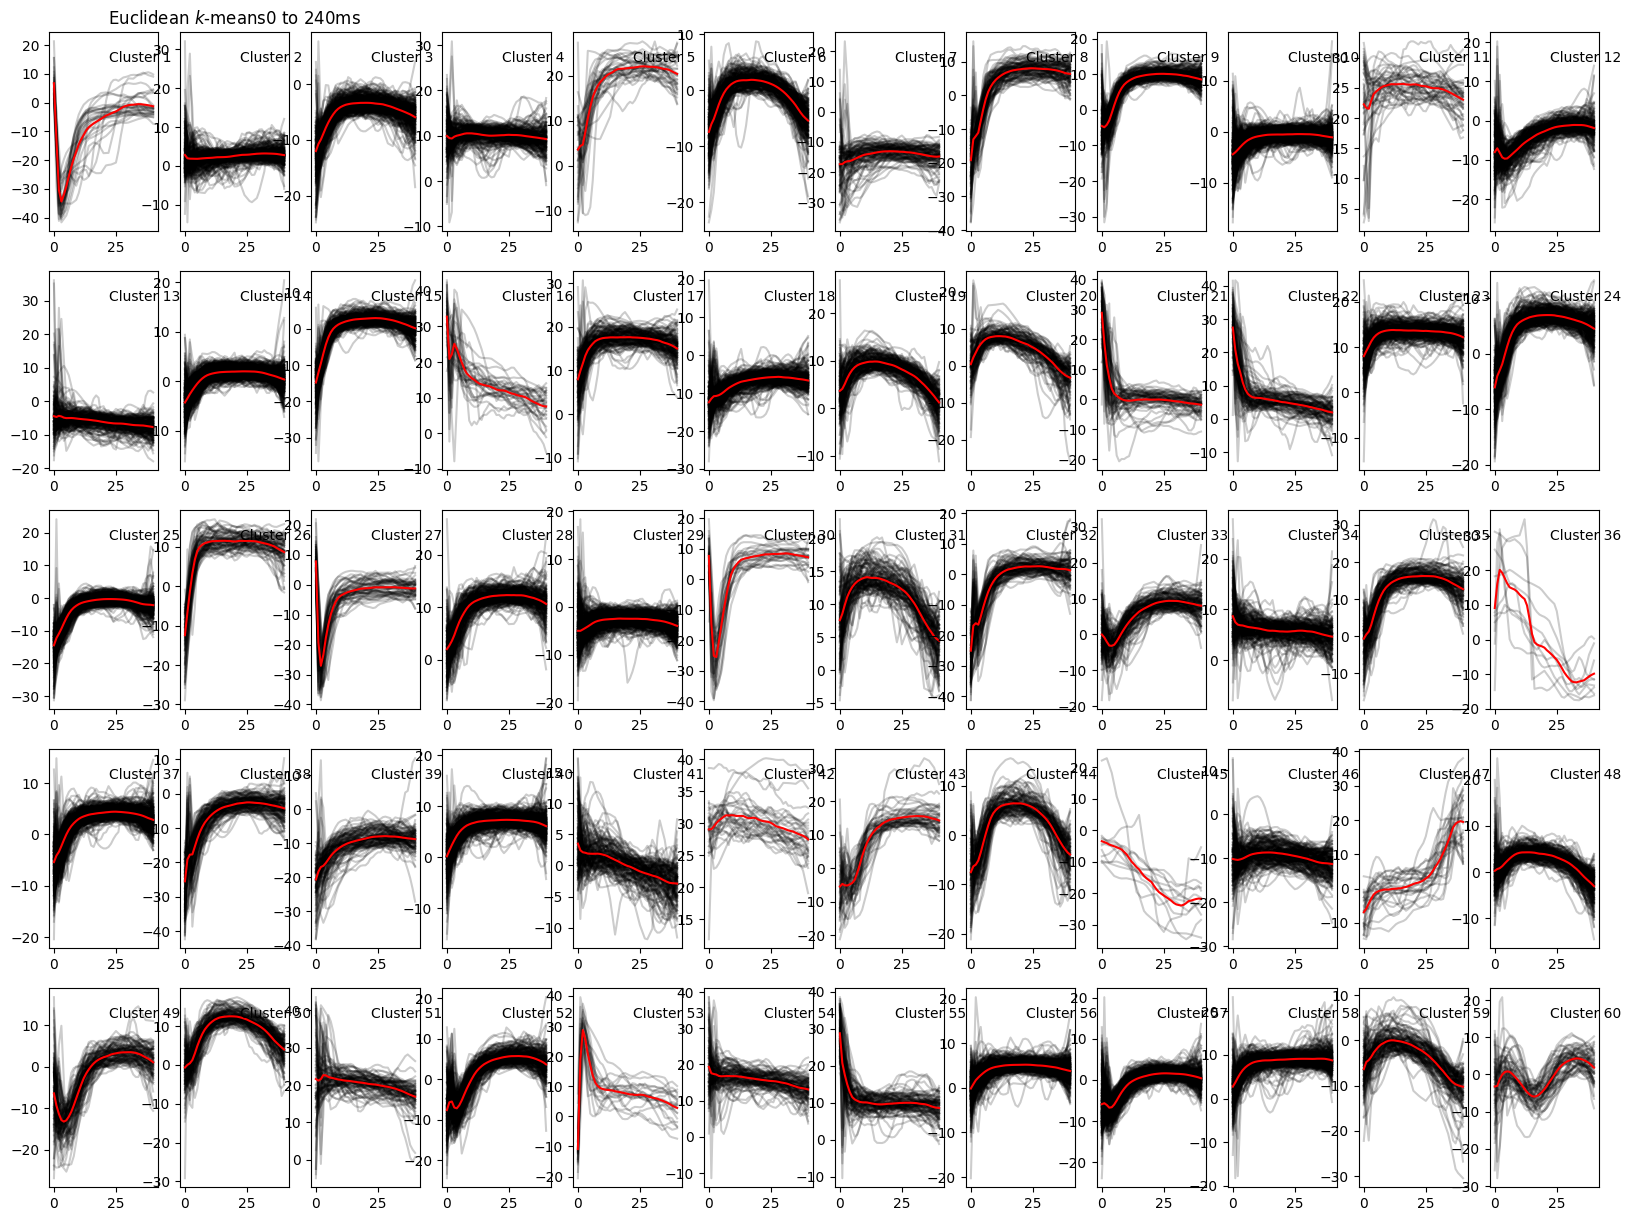

In [ ]:
y_pred, km = cluster_functions.cluster_and_plot(X, num_clusters=60, num_samples ='0 to 240ms')
cluster_functions.cluster_distribution(y_pred)

In [ ]:
cluster_assignments = {}
count = 0
for i, (key, value) in enumerate(all_info_method.items()):
    for note, inner_list in value.items():
        cluster_assignments[(key, note)] = int(y_pred[count])
        count+=1
display(cluster_assignments[:5])